In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)

#from sklearn.model_selection import KFold
from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from matplotlib import pyplot as plt

In [3]:
original = pd.read_csv('../Data/Original.csv')

In [4]:
original.shape

(2580, 82)

In [5]:
YearSold = original[['SalePrice', 'YrSold']]
YearSold = YearSold.rename(columns={'YrSold':'Year'})
YearSold.head(3)

,SalePrice,Year
0,126000,2010
1,139500,2009
2,124900,2007


In [6]:
YearSold.groupby('Year')['SalePrice'].describe().transpose()

Year,2006,2007,2008,2009,2010
count,516.000000,600.000000,564.000000,585.000000,315.000000
mean,176649.310078,179045.075000,178170.021277,180387.644444,173971.666667
std,75929.118947,76923.149334,72518.336201,75530.097229,73645.045773
min,35000.000000,39300.000000,40000.000000,34900.000000,12789.000000
25%,130000.000000,129500.000000,130000.000000,130000.000000,128000.000000
50%,157000.000000,159000.000000,162700.000000,162000.000000,157900.000000
75%,202788.750000,209500.000000,212775.000000,213000.000000,205000.000000
max,625000.000000,755000.000000,615000.000000,610000.000000,611657.000000


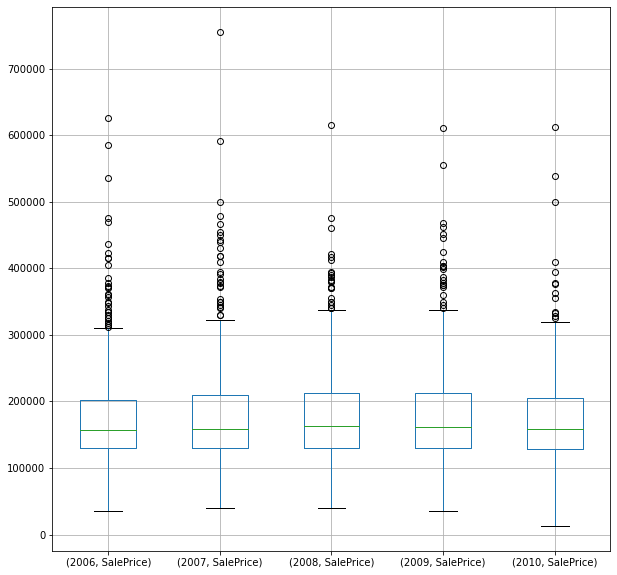

In [8]:
plt.figure(figsize=(10,10))
YearSold.groupby('Year')[['SalePrice']].boxplot(column='SalePrice',subplots=False);

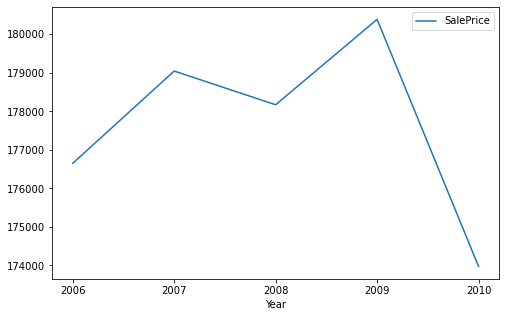

In [34]:
##Not super helpful, but just to show you how the mean changes vs median above: 
YearSold.groupby('Year')[['SalePrice']].mean().plot(figsize=(8,5),
                                                    xticks=np.arange(2006,2011,1));

In [111]:
Yr2006 = YearSold[YearSold.Year==2006]
Yr2006.head(3)

,SalePrice,Year
36,196000,2006
37,61500,2006
43,133500,2006


In [112]:
#Cross Check with 'describe' above: 
Q1 = Yr2006.SalePrice.quantile(0.25)
Q3 = Yr2006.SalePrice.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

130000.0 202788.75 72788.75


In [113]:
Outs2006 = Yr2006[(Yr2006.SalePrice < Q1 - (1.5 * IQR))|(Yr2006.SalePrice > Q3 + 1.5*IQR)]
print('2006 Upper Bound: US$%d' %(Q3 + 1.5 * IQR))
print('Number of Outliers: %d' %len(Outs2006))
Outs2006.head(3)

2006 Upper Bound: US$311971
Number of Outliers: 32


,SalePrice,Year
45,325300,2006
173,423000,2006
198,321000,2006


In [114]:
Yr2007 = YearSold[YearSold.Year==2007]
Yr2007.head(3)

,SalePrice,Year
2,124900,2007
9,140000,2007
16,203000,2007


In [115]:
#Cross Check with 'describe' above: 
Q1 = Yr2007.SalePrice.quantile(0.25)
Q3 = Yr2007.SalePrice.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

129500.0 209500.0 80000.0


In [116]:
Outs2007 = Yr2007[(Yr2007.SalePrice < Q1 - (1.5 * IQR))|(Yr2007.SalePrice > Q3 + 1.5*IQR)]
print('2007 Upper Bound: US$%d' %(Q3 + 1.5 * IQR))
print('Number of Outliers: %d' %len(Outs2007))
Outs2007.head(3)

2007 Upper Bound: US$329500
Number of Outliers: 28


,SalePrice,Year
29,450000,2007
56,395000,2007
108,500067,2007


In [117]:
Yr2008 = YearSold[YearSold.Year==2008]
Yr2008.head(3)

,SalePrice,Year
7,187687,2008
8,137500,2008
10,219500,2008


In [118]:
#Cross Check with 'describe' above: 
Q1 = Yr2008.SalePrice.quantile(0.25)
Q3 = Yr2008.SalePrice.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

130000.0 212775.0 82775.0


In [119]:
Outs2008 = Yr2008[(Yr2008.SalePrice < Q1 - (1.5 * IQR))|(Yr2008.SalePrice > Q3 + 1.5*IQR)]
print('2008 Upper Bound: US$%d' %(Q3 + 1.5 * IQR))
print('Number of Outliers: %d' %len(Outs2008))
Outs2008.head(3)

2008 Upper Bound: US$336937
Number of Outliers: 22


,SalePrice,Year
58,341000,2008
63,390000,2008
65,615000,2008


In [120]:
Yr2009 = YearSold[YearSold.Year==2009]
Yr2009.head(3)

,SalePrice,Year
1,139500,2009
3,114000,2009
4,227000,2009


In [121]:
#Cross Check with 'describe' above: 
Q1 = Yr2009.SalePrice.quantile(0.25)
Q3 = Yr2009.SalePrice.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

130000.0 213000.0 83000.0


In [122]:
Outs2009 = Yr2009[(Yr2009.SalePrice < Q1 - (1.5 * IQR))|(Yr2009.SalePrice > Q3 + 1.5*IQR)]
print('2009 Upper Bound: US$%d' %(Q3 + 1.5 * IQR))
print('Number of Outliers: %d' %len(Outs2009))
Outs2009.head(3)

2009 Upper Bound: US$337500
Number of Outliers: 22


,SalePrice,Year
103,468000,2009
287,372500,2009
355,375000,2009


In [123]:
Yr2010 = YearSold[YearSold.Year==2010]
Yr2010.head(3)

,SalePrice,Year
0,126000,2010
11,136000,2010
18,205000,2010


In [124]:
#Cross Check with 'describe' above: 
Q1 = Yr2010.SalePrice.quantile(0.25)
Q3 = Yr2010.SalePrice.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

128000.0 205000.0 77000.0


In [125]:
Outs2010 = Yr2010[(Yr2010.SalePrice < Q1 - (1.5 * IQR))|(Yr2010.SalePrice > Q3 + 1.5*IQR)]
print('2010 Upper Bound: US$%d' %(Q3 + 1.5 * IQR))
print('Number of Outliers: %d' %len(Outs2010))
Outs2010.head(3)

2010 Upper Bound: US$320500
Number of Outliers: 13


,SalePrice,Year
214,500000,2010
332,378500,2010
522,394432,2010
